In [5]:
from msclap import CLAP
import torch
import torch.nn.functional as F
import numpy as np
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import pandas as pd
import os
import pickle

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [7]:
kids = pd.read_pickle('/work/data_pipeline/audio_data/preprocessing/web_free_source_raw/OpenSLR/SLR101/meta_metrics.pkl')

In [18]:
df = pd.read_pickle('/work/data_pipeline/audio_data/preprocessing/web_free_source_raw/OpenSLR/SLR101/meta_metrics.pkl').dropna()
kids = df[df['age'].astype(int) <= 11]
kids['class'] = 'child'
display(kids)

df = pd.read_pickle('/work/data_pipeline/audio_data/preprocessing/web_free_source_raw/OpenSLR/SLR101/meta_metrics.pkl').dropna()
adults = df[df['age'].astype(int) > 11]
adults['class'] = 'adult'
display(adults)

,filepath,sample_rate,audio_length,channels,file_size_mb,length,filepath_enhanced,snr_16k,analysis_window_length,verdict_by_window,...,gender,age,accuracy,completeness,fluency,prosodic,words,total,text,class
0,/work/data_pipeline/audio_data/preprocessing/w...,16000,3.10,1,0.094646,49600.0,/work/data_pipeline/audio_data/preprocessing/w...,19.347797,0.2,"[Clean, Clean, Clean, Clean, Clean, Clean, Cle...",...,m,7,7.0,10.0,8.0,7.0,"[{'accuracy': 8, 'stress': 10, 'phones': ['Z',...",7.0,ZERO THREE ONE THREE,child
3,/work/data_pipeline/audio_data/preprocessing/w...,16000,2.96,1,0.090374,47360.0,/work/data_pipeline/audio_data/preprocessing/w...,37.513278,0.2,"[Clean, Clean, Clean, Clean, Clean, Clean, Clean]",...,m,9,8.0,10.0,8.0,8.0,"[{'accuracy': 10, 'stress': 10, 'phones': ['DH...",8.0,THE YEAR WAS NOW OVER,child
4,/work/data_pipeline/audio_data/preprocessing/w...,16000,4.83,1,0.147442,77280.0,/work/data_pipeline/audio_data/preprocessing/w...,28.772051,0.2,"[Clean, Clean, Clean, Clean, Clean, Clean, Cle...",...,m,10,8.0,10.0,8.0,8.0,"[{'accuracy': 10, 'stress': 10, 'phones': ['HH...",7.0,HE HAS A ROUND FACE AND TWO SMALL EYES,child
8,/work/data_pipeline/audio_data/preprocessing/w...,16000,2.75,1,0.083965,44000.0,/work/data_pipeline/audio_data/preprocessing/w...,35.850266,0.2,"[Clean, Clean, Clean, Clean, Clean, Clean]",...,m,6,9.0,10.0,9.0,9.0,"[{'accuracy': 10, 'stress': 10, 'phones': ['T'...",9.0,TWO EIGHT NINE ONE,child
14,/work/data_pipeline/audio_data/preprocessing/w...,16000,4.41,1,0.134624,70560.0,/work/data_pipeline/audio_data/preprocessing/w...,22.956652,0.2,"[Clean, Clean, Clean, Clean, Clean, Clean, Cle...",...,m,9,8.0,10.0,8.0,8.0,"[{'accuracy': 10, 'stress': 10, 'phones': ['AY...",8.0,I TAKE PEOPLE YOU KNOW AS I FIND THEM,child
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5236,/work/data_pipeline/audio_data/preprocessing/w...,16000,6.62,1,0.202068,105920.0,/work/data_pipeline/audio_data/preprocessing/w...,26.282317,0.2,"[Clean, Clean, Clean, Clean, Clean, Clean, Cle...",...,m,7,7.0,10.0,6.0,7.0,"[{'accuracy': 8, 'stress': 10, 'phones': ['L',...",6.0,LUCY WILL A READ IN JUNE SIXTH SEE,child
5237,/work/data_pipeline/audio_data/preprocessing/w...,16000,3.21,1,0.098003,51360.0,/work/data_pipeline/audio_data/preprocessing/w...,33.087924,0.2,"[Clean, Clean, Clean, Clean, Clean, Clean, Cle...",...,m,9,8.0,10.0,8.0,8.0,"[{'accuracy': 10, 'stress': 10, 'phones': ['B'...",8.0,BUT WHAT DOES SHE WANT HERE,child
5239,/work/data_pipeline/audio_data/preprocessing/w...,16000,1.59,1,0.048565,25440.0,/work/data_pipeline/audio_data/preprocessing/w...,41.174023,0.2,[Clean],...,m,6,9.0,10.0,9.0,7.0,"[{'accuracy': 10, 'stress': 10, 'phones': ['G'...",8.0,GOOD JOB,child
5242,/work/data_pipeline/audio_data/preprocessing/w...,16000,4.46,1,0.136150,71360.0,/work/data_pipeline/audio_data/preprocessing/w...,40.316024,0.2,"[Clean, Clean, Clean, Clean, Clean, Clean, Cle...",...,m,9,8.0,10.0,7.0,8.0,"[{'accuracy': 10, 'stress': 10, 'phones': ['IH...",8.0,IT WAS OF HER I WANTED TO HEAR OF HER,child


,filepath,sample_rate,audio_length,channels,file_size_mb,length,filepath_enhanced,snr_16k,analysis_window_length,verdict_by_window,...,gender,age,accuracy,completeness,fluency,prosodic,words,total,text,class
1,/work/data_pipeline/audio_data/preprocessing/w...,16000,3.764,1,0.114910,60224.0,/work/data_pipeline/audio_data/preprocessing/w...,26.595115,0.2,"[Clean, Clean, Clean, Clean, Clean, Clean, Cle...",...,f,30,3.0,10.0,4.0,3.0,"[{'accuracy': 10, 'stress': 10, 'phones': ['B'...",3.0,BUT THE EYES WERE THE THING.,adult
2,/work/data_pipeline/audio_data/preprocessing/w...,16000,5.540,1,0.169109,88640.0,/work/data_pipeline/audio_data/preprocessing/w...,41.385789,0.2,"[Clean, Clean, Clean, Clean, Clean, Clean, Cle...",...,f,21,5.0,10.0,6.0,6.0,"[{'accuracy': 10, 'stress': 10, 'phones': ['AH...",5.0,A SURGEON WAS AT WORK AMONG THE SUFFERERS,adult
5,/work/data_pipeline/audio_data/preprocessing/w...,16000,3.020,1,0.092205,48320.0,/work/data_pipeline/audio_data/preprocessing/w...,34.151505,0.2,"[Clean, Clean, Clean, Clean, Clean, Clean, Cle...",...,f,15,9.0,10.0,9.0,8.0,"[{'accuracy': 10, 'stress': 10, 'phones': ['HH...",8.0,HE MAY BE ABLE TO TELL YOU SOMETHING,adult
6,/work/data_pipeline/audio_data/preprocessing/w...,16000,4.518,1,0.137920,72288.0,/work/data_pipeline/audio_data/preprocessing/w...,25.161080,0.2,"[Clean, Clean, Clean, Clean, Clean, Clean, Cle...",...,f,12,7.0,10.0,6.0,7.0,"[{'accuracy': 10, 'stress': 10, 'phones': ['DH...",6.0,THE CHILDREN PRESENTLY RETURNED,adult
7,/work/data_pipeline/audio_data/preprocessing/w...,16000,3.463,1,0.105724,55408.0,/work/data_pipeline/audio_data/preprocessing/w...,32.366536,0.2,"[Clean, Clean, Clean, Clean, Clean, Clean, Cle...",...,m,20,8.0,10.0,10.0,9.0,"[{'accuracy': 10, 'stress': 10, 'phones': ['AY...",8.0,I HOPE YOU FIND OUT WHAT THE WORD IS,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5233,/work/data_pipeline/audio_data/preprocessing/w...,16000,3.000,1,0.091595,48000.0,/work/data_pipeline/audio_data/preprocessing/w...,18.146806,0.2,"[Clean, Clean, Clean, Clean, Clean, Clean, Cle...",...,f,20,8.0,10.0,8.0,8.0,"[{'accuracy': 10, 'stress': 10, 'phones': ['TH...",8.0,THANK YOU FOR THE ASSIST,adult
5234,/work/data_pipeline/audio_data/preprocessing/w...,16000,2.920,1,0.089153,46720.0,/work/data_pipeline/audio_data/preprocessing/w...,19.943159,0.2,"[Saturated, Clean, Clean, Clean, Clean]",...,m,37,8.0,10.0,9.0,8.0,"[{'accuracy': 10, 'stress': 10, 'phones': ['F'...",8.0,FEELS GOOD TO BE HERE AGAIN,adult
5238,/work/data_pipeline/audio_data/preprocessing/w...,16000,4.865,1,0.148510,77840.0,/work/data_pipeline/audio_data/preprocessing/w...,25.414089,0.2,"[Clean, Clean, Clean, Clean, Clean, Clean, Cle...",...,m,12,9.0,10.0,8.0,8.0,"[{'accuracy': 10, 'stress': 10, 'phones': ['W'...",8.0,WE CANNOT TAKE FROM THEM WHAT THEY HAVE NOT GOT,adult
5241,/work/data_pipeline/audio_data/preprocessing/w...,16000,3.020,1,0.092205,48320.0,/work/data_pipeline/audio_data/preprocessing/w...,41.599651,0.2,"[Clean, Clean, Clean, Clean, Clean, Clean, Cle...",...,f,21,8.0,10.0,8.0,8.0,"[{'accuracy': 10, 'stress': 10, 'phones': ['B'...",8.0,BUT YOU HAVE TO LISTEN DARLING,adult


In [19]:
#Create single df 
df = pd.concat([adults[['filepath', 'class']], kids[['filepath', 'class']]])
display(df)

,filepath,class
1,/work/data_pipeline/audio_data/preprocessing/w...,adult
2,/work/data_pipeline/audio_data/preprocessing/w...,adult
5,/work/data_pipeline/audio_data/preprocessing/w...,adult
6,/work/data_pipeline/audio_data/preprocessing/w...,adult
7,/work/data_pipeline/audio_data/preprocessing/w...,adult
...,...,...
5236,/work/data_pipeline/audio_data/preprocessing/w...,child
5237,/work/data_pipeline/audio_data/preprocessing/w...,child
5239,/work/data_pipeline/audio_data/preprocessing/w...,child
5242,/work/data_pipeline/audio_data/preprocessing/w...,child


In [20]:
classes = df['class'].unique()

class_id_map = {name: i for i, name in enumerate(classes, 0)}
print(class_id_map)

prompt = 'The speaker is the age of a'
y = [prompt + x for x in classes]


{'adult': 0, 'child': 1}


In [21]:
# Load and initialize CLAP
clap_model = CLAP(version = '2023', use_cuda=True)

# Computing text embeddings
text_embeddings = clap_model.get_text_embeddings(y)

In [22]:
# Computing audio embeddings
y_preds, y_labels = [], []
print(os.getcwd())

for i in tqdm(range(len(df))):
    path, label = df.iloc[i]
    idx = class_id_map[label]
    #print(idx)
    one_hot_target = torch.nn.functional.one_hot(torch.tensor([idx]), num_classes=len(classes)+1)

    audio_embeddings = clap_model.get_audio_embeddings([path], resample=True)
    similarity = clap_model.compute_similarity(audio_embeddings, text_embeddings)

    y_pred = F.softmax(similarity.detach().cpu(), dim=1).numpy()

    y_preds.append(y_pred)
    y_labels.append(one_hot_target.detach().cpu().numpy())


/mounts/ud-data/jtaylor/a5f2c23d-7fb6-41a6-ac0c-3a2ffc02b992/data/acoustic_scene_classification/CLAP-main/examples


100%|██████████| 4999/4999 [08:57<00:00,  9.30it/s]


In [23]:
y_lab, y_pred = np.concatenate(y_labels, axis=0), np.concatenate(y_preds, axis=0)
y_label_val = np.argmax(y_lab, axis=1)
y_pred_val = np.argmax(y_pred, axis=1)
acc = accuracy_score(np.argmax(y_lab, axis=1), np.argmax(y_pred, axis=1))
print('Accuracy {}'.format(acc))

Accuracy 0.7319463892778556


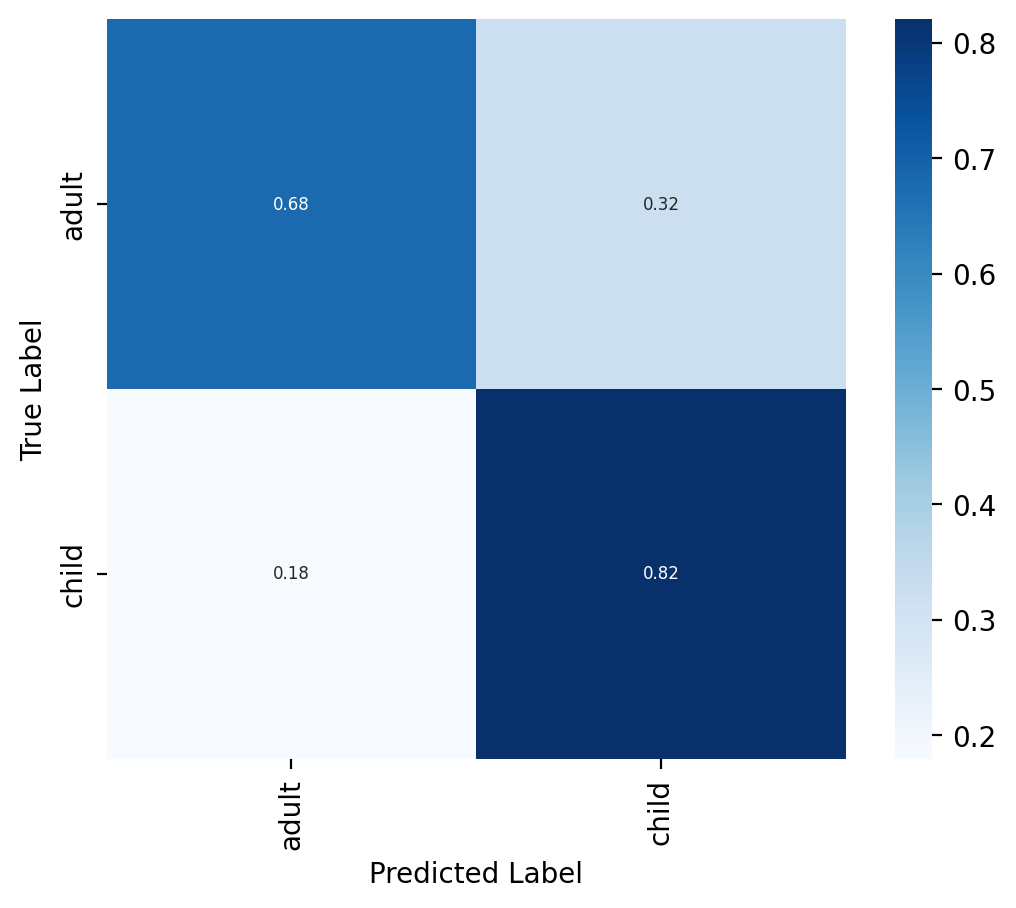

In [24]:
# get confusion matrix
conf_matrix = confusion_matrix(y_label_val,y_pred_val)
conf_mat_norm_recall = conf_matrix.astype('float32')/conf_matrix.sum(axis=1)[:,np.newaxis]
recall_by_class = np.diagonal(conf_mat_norm_recall)
mean_recall = np.mean(recall_by_class)

# Calculate row sums to use for percentages
row_sums = conf_matrix.sum(axis=1)

# Calculate percentages
percentages = (conf_matrix.T / row_sums).T  # Transpose for division, then transpose back

# Format percentages as strings with '%' symbol
annot_data = [['{:.2f}'.format(val) for val in row] for row in percentages]
annot_data = [['' if float(val <= 0.04) else '{:.2f}'.format(val) for val in row] for row in percentages]

plt.figure(dpi=200)

annot_kws = {'size': 6}
ax = sns.heatmap(percentages, xticklabels=classes, yticklabels=classes, annot=annot_data, fmt='', square=True, cmap='Blues', annot_kws=annot_kws)
ax.set_xlabel('Predicted Label')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_ylabel('True Label')

#plt.subplots_adjust(left=0.2, bottom=0.35)
plt.show()

In [71]:
# Ages 8 - 16 for what a 'child' is
slr_df = pd.read_pickle('/work/data_pipeline/audio_data/preprocessing/web_free_source_raw/OpenSLR/SLR101/meta_metrics.pkl').dropna()

results_dict = {}

for age in range(7, 17):
	print(f'Age: {age}')
 
	kids = slr_df[slr_df['age'].astype(int) <= age]
	kids['class'] = 'child'

	adults = slr_df[slr_df['age'].astype(int) > age]
	adults['class'] = 'adult'
 
	df = pd.concat([adults[['filepath', 'class']], kids[['filepath', 'class']]])
 
	classes = df['class'].unique()

	class_id_map = {name: i for i, name in enumerate(classes, 0)}
	print(class_id_map)

	prompt = 'The speaker is the age of a'
	y = [prompt + x for x in classes]

	# Load and initialize CLAP
	clap_model = CLAP(version = '2023', use_cuda=True)
 
	# Computing audio embeddings
	y_preds, y_labels = [], []
	print(os.getcwd())

	for i in tqdm(range(len(df))):
		path, label = df.iloc[i]
		idx = class_id_map[label]
		#print(idx)
		one_hot_target = torch.nn.functional.one_hot(torch.tensor([idx]), num_classes=len(classes)+1)

		audio_embeddings = clap_model.get_audio_embeddings([path], resample=True)
		similarity = clap_model.compute_similarity(audio_embeddings, text_embeddings)

		y_pred = F.softmax(similarity.detach().cpu(), dim=1).numpy()

		y_preds.append(y_pred)
		y_labels.append(one_hot_target.detach().cpu().numpy())
  
	y_lab, y_pred = np.concatenate(y_labels, axis=0), np.concatenate(y_preds, axis=0)
	y_label_val = np.argmax(y_lab, axis=1)
	y_pred_val = np.argmax(y_pred, axis=1)
	acc = accuracy_score(np.argmax(y_lab, axis=1), np.argmax(y_pred, axis=1))
	
	print('Accuracy {}'.format(acc))

	conf_matrix = confusion_matrix(y_label_val,y_pred_val)
	conf_mat_norm_recall = conf_matrix.astype('float32')/conf_matrix.sum(axis=1)[:,np.newaxis]
	print(conf_mat_norm_recall)
 
	results_dict[age] = conf_matrix

  	
    

Age: 7
{'adult': 0, 'child': 1}
/mounts/ud-data/jtaylor/a5f2c23d-7fb6-41a6-ac0c-3a2ffc02b992/data/acoustic_scene_classification/CLAP-main/examples


  7%|▋         | 338/4999 [00:25<05:13, 14.85it/s]

In [70]:
conf_matrix_dict = {}

for age, conf in results_dict.items():
    print(age)
    tn = conf[0, 0]
    fn = conf[0, 1]
    tp = conf[1, 1]
    fp = conf[1, 0]
    
    acc=(tp+tn)/(tn+fn+tp+fp)
    
    conf_p = conf.astype('float32')/conf.sum(axis=1)[:,np.newaxis]
    tn_p = conf_p[0, 0]
    fn_p = conf_p[0, 1]
    tp_p = conf_p[1, 1]
    fp_p = conf_p[1, 0]
    
    conf_matrix_dict[age] = {'tn':tn, 'fn':fn, 'tp':tp, 'fp':fp, 'acc':acc, 'tn_p':tn_p, 'fn_p':fn_p, 'tp_p':tp_p, 'fp_p':fp_p }
    


7


KeyError: (0, 0)

In [67]:
print(results_dict)
results_df = pd.DataFrame.from_dict(results_dict)

{7: {'tn': 2368, 'fn': 1692, 'tp': 839, 'fp': 100, 'acc': 0.6415283056611323, 'tn_p': 0.68828125, 'fn_p': 0.31171875, 'tp_p': 0.7117671176711767, 'fp_p': 0.28823288232882327}, 8: {'tn': 2337, 'fn': 1563, 'tp': 970, 'fp': 129, 'acc': 0.6615323064612922, 'tn_p': 0.68828125, 'fn_p': 0.31171875, 'tp_p': 0.7117671176711767, 'fp_p': 0.28823288232882327}, 9: {'tn': 2310, 'fn': 1210, 'tp': 1320, 'fp': 159, 'acc': 0.7261452290458091, 'tn_p': 0.68828125, 'fn_p': 0.31171875, 'tp_p': 0.7117671176711767, 'fp_p': 0.28823288232882327}, 10: {'tn': 2237, 'fn': 1163, 'tp': 1376, 'fp': 223, 'acc': 0.7227445489097819, 'tn_p': 0.68828125, 'fn_p': 0.31171875, 'tp_p': 0.7117671176711767, 'fp_p': 0.28823288232882327}, 11: {'tn': 2132, 'fn': 1008, 'tp': 1525, 'fp': 334, 'acc': 0.7315463092618524, 'tn_p': 0.68828125, 'fn_p': 0.31171875, 'tp_p': 0.7117671176711767, 'fp_p': 0.28823288232882327}, 12: {'tn': 1988, 'fn': 932, 'tp': 1607, 'fp': 472, 'acc': 0.7191438287657531, 'tn_p': 0.68828125, 'fn_p': 0.31171875, '

In [69]:
display(results_df.T)

,tn,fn,tp,fp,acc,tn_p,fn_p,tp_p,fp_p
7,2368.0,1692.0,839.0,100.0,0.641528,0.688281,0.311719,0.711767,0.288233
8,2337.0,1563.0,970.0,129.0,0.661532,0.688281,0.311719,0.711767,0.288233
9,2310.0,1210.0,1320.0,159.0,0.726145,0.688281,0.311719,0.711767,0.288233
10,2237.0,1163.0,1376.0,223.0,0.722745,0.688281,0.311719,0.711767,0.288233
11,2132.0,1008.0,1525.0,334.0,0.731546,0.688281,0.311719,0.711767,0.288233
12,1988.0,932.0,1607.0,472.0,0.719144,0.688281,0.311719,0.711767,0.288233
13,1950.0,910.0,1625.0,514.0,0.715143,0.688281,0.311719,0.711767,0.288233
14,1921.0,899.0,1635.0,544.0,0.711342,0.688281,0.311719,0.711767,0.288233
15,1760.0,800.0,1736.0,703.0,0.699340,0.688281,0.311719,0.711767,0.288233
16,1762.0,798.0,1736.0,703.0,0.699740,0.688281,0.311719,0.711767,0.288233
